Import Libraries

In [0]:
import numpy as np
from typing import Union
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets

Householder algorithm converts a normal matrix to a Hessenberg matrix

In [0]:
def householder_vectorized(a):
    v = a / (a[0] + np.copysign(np.linalg.norm(a), a[0]))
    v[0] = 1
    tau = 2 / (v.T @ v)

    return v,tau

QR decomposition find the Q and R components of the given matrix

In [0]:
def qr_decomposition(A: np.ndarray) -> Union[np.ndarray, np.ndarray]:
    m,n = A.shape
    R = A.copy()
    Q = np.identity(m)

    for j in range(0, n):
        # Apply Householder transformation.
        v, tau = householder_vectorized(R[j:, j, np.newaxis])

        H = np.identity(m)
        H[j:, j:] -= tau * (v @ v.T)
        R = H @ R
        Q = H @ Q

    return Q[:n].T, np.triu(R[:n])

Given Q and R matrices of the given matrix, we can converge them to get the Eigenvectors of the matrix

In [0]:
def findEigVec(Q,R):
  tol=0.0001
  previous = np.empty(shape=Q.shape)
  U = np.empty(shape=Q.shape)
  U[:] = Q
  for i in range(500):
      previous[:] = Q
      X = R @ Q
      Q, R = qr_decomposition(X)
      U = U @ Q
      if np.allclose(X, np.triu(X), atol=tol): 
          break
  return U

Load iris dataset

In [0]:
iris = datasets.load_iris()
A=iris.data
y=iris.target

Normalize and find the covariance of the dataset

In [0]:
col_sums = A.sum(axis=0)
X = A/ col_sums[np.newaxis, :]
X = np.cov(X)

Find the eigen vectors of the dataset using above algorithm



In [0]:
Q, R = qr_decomposition(X)
np.set_printoptions(linewidth=9999, precision=20, suppress=True)
U=findEigVec(Q,R)
print(U)

[[ 0.11531961888954217   -0.014696211336250254   0.009171488348886625  ...  0.004012901141198944   0.014292310898583549   0.0012491179810727709]
 [ 0.09818455576034818    0.026260771457112798   0.0837331327864429    ...  0.023015693234651222  -0.004861343859172267  -0.035867682825426676 ]
 [ 0.1041433580560701    -0.014813666989081502   0.016597407832977522  ...  0.012360034854088082  -0.011703750142692405  -0.02451621634867111  ]
 ...
 [-0.07695021251571647   -0.06159440247785303    0.041739822428006654  ...  0.017546933989884418  -0.0011283991468888162 -0.007043129483431445 ]
 [-0.09253838925621836   -0.19097599200822368   -0.08053311903775974   ... -0.01716422806398791    0.005429390466046647  -0.003803577382455763 ]
 [-0.0648720831627246    -0.04037165527761      -0.12199848955852041   ... -0.07588266235942795    0.040634799320848326  -0.009233659248924175 ]]


Find the eigen vectors of the dataset using inbuilt numpy function


In [0]:
x=np.linalg.eig(X)
print(x[1])

[[ 0.1153152115526433    +0.j  0.01519517535285176   +0.j -0.008379615597860258  +0.j ...  0.0006579547317552368 +0.j -0.0032867306158212493 +0.j  0.0000000000000001861 +0.j]
 [ 0.09819051175354833   +0.j -0.02175480161002644   +0.j -0.08500837983455779   +0.j ...  0.004188517168047398  +0.j  0.0027277256118228136 +0.j  0.00000000000000000611+0.j]
 [ 0.10413877596344259   +0.j  0.015703070237763572  +0.j -0.01578881343154538   +0.j ...  0.011827845164890183  +0.j -0.008497023401445567  +0.j -0.00000000000000024979+0.j]
 ...
 [-0.07696872401184317   +0.j  0.06369916599911991   +0.j -0.03841419235314531   +0.j ...  0.0011825169500993163 +0.j  0.025867079317243857  +0.j -0.00000000000000074702+0.j]
 [-0.09259179240587717   +0.j  0.18640954978371121   +0.j  0.0905483627688073    +0.j ...  0.013685341500511273  +0.j -0.027195634663914586  +0.j -0.00000000000000006126+0.j]
 [-0.06488137123805314   +0.j  0.033826063741324644  +0.j  0.12396811790264498   +0.j ... -0.003022223418778812  +0.j -0

Calculates the PCA components

In [0]:
def calcPCAvec(A):
  Q, R = qr_decomposition(A)
  U=findEigVec(Q,R)
  U=U.T
  U=U[:2][:]
  U=U.T
  P=A@U
  return P

In [0]:
P=calcPCAvec(X)
dfqr = pd.DataFrame(data = P
             , columns = ['PC1','PC2'])
print(dfqr)

          PC1           PC2
0    0.000078 -4.531030e-07
1    0.000066  7.245772e-07
2    0.000070 -4.693271e-07
3    0.000066  4.005745e-07
4    0.000079 -8.718356e-07
5    0.000075 -2.183846e-06
6    0.000068 -1.840055e-06
7    0.000074  6.035938e-08
8    0.000061  3.581818e-07
9    0.000073  1.813695e-06
10   0.000082 -2.798557e-07
11   0.000072  1.550892e-07
12   0.000071  1.614279e-06
13   0.000071 -1.093121e-07
14   0.000093 -1.689388e-06
15   0.000088 -3.943550e-06
16   0.000078 -3.609602e-06
17   0.000072 -1.473659e-06
18   0.000079 -4.828475e-07
19   0.000078 -1.980854e-06
20   0.000074  1.296656e-06
21   0.000071 -2.713532e-06
22   0.000081 -2.821011e-06
23   0.000055 -1.869698e-06
24   0.000070  1.224407e-06
25   0.000065  1.568310e-06
26   0.000063 -1.624314e-06
27   0.000077  3.419081e-08
28   0.000076 -3.437043e-08
29   0.000068  5.999904e-07
..        ...           ...
120 -0.000065 -3.338882e-06
121 -0.000058 -3.678325e-06
122 -0.000063  5.485528e-06
123 -0.000046 -4.333

Calculates PCA components using inbuilt Scikit learn function

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(A)
dfskl = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2'])
print(dfskl)

          PC1       PC2
0   -2.684126  0.319397
1   -2.714142 -0.177001
2   -2.888991 -0.144949
3   -2.745343 -0.318299
4   -2.728717  0.326755
5   -2.280860  0.741330
6   -2.820538 -0.089461
7   -2.626145  0.163385
8   -2.886383 -0.578312
9   -2.672756 -0.113774
10  -2.506947  0.645069
11  -2.612755  0.014730
12  -2.786109 -0.235112
13  -3.223804 -0.511395
14  -2.644750  1.178765
15  -2.386039  1.338062
16  -2.623528  0.810680
17  -2.648297  0.311849
18  -2.199820  0.872839
19  -2.587986  0.513560
20  -2.310256  0.391346
21  -2.543705  0.432996
22  -3.215939  0.133468
23  -2.302733  0.098709
24  -2.355754 -0.037282
25  -2.506669 -0.146017
26  -2.468820  0.130951
27  -2.562320  0.367719
28  -2.639535  0.312040
29  -2.631989 -0.196961
..        ...       ...
120  2.427818  0.378196
121  1.199001 -0.606092
122  3.499920  0.460674
123  1.388766 -0.204399
124  2.275431  0.334991
125  2.614090  0.560901
126  1.258508 -0.179705
127  1.291132 -0.116669
128  2.123609 -0.209729
129  2.388003  0

Plots PCA components calculated above

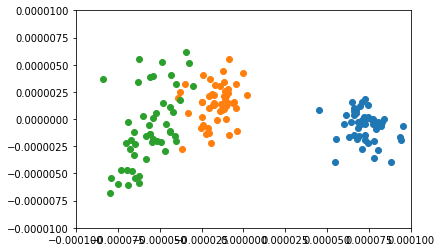

In [0]:
x=P[: , 0]
y=P[: , 1]

plt.ylim(-0.00001,0.00001)
plt.xlim(-0.0001,0.0001)
count=0
for i in range(3):
  plt.scatter(x[count:count+50], y[count:count+50])
  count+=50
plt.show()

Plots PCA components found using inbuilt Scikit learn function

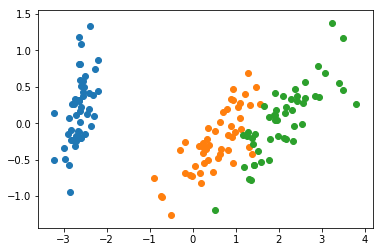

In [0]:
x=principalComponents[: , 0]
y=principalComponents[: , 1]

count=0
for i in range(3):
  plt.scatter(x[count:count+50], y[count:count+50])
  count+=50
plt.show()